In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Example of using numpy, pandas, and matplotlib

## Creating dataframe

In [2]:
df = pd.DataFrame(columns=['A', 'B', 'C'])

for col in df.columns:
    df[col] = np.random.lognormal(size=10000)

df['D'] = df['A'] * df['B']

df.head()

,A,B,C,D
0,0.951377,0.387675,0.633425,0.368825
1,0.621005,9.409539,0.796282,5.843375
2,2.102478,0.355088,9.179889,0.746564
3,2.402607,4.131636,0.297474,9.926698
4,0.739289,0.241467,0.903735,0.178514


## Taking the log, plotting the results

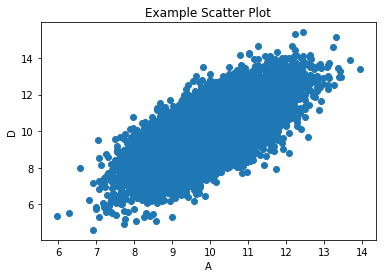

In [3]:
# Try out square rooting D

df_mod = np.log(df) + 10
#df_mod['D'] = np.sqrt(df_mod['D'])

plt.scatter(df_mod['A'], df_mod['D'])
plt.xlabel('A')
plt.ylabel('D')
plt.title('Example Scatter Plot')
plt.show()

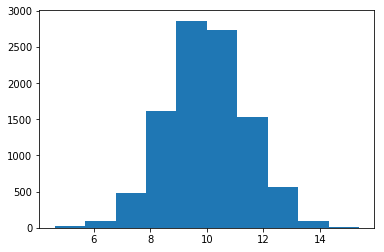

In [4]:
plt.hist(df_mod['D'])
plt.show()

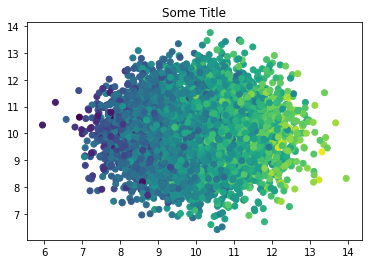

In [5]:
plt.scatter(df_mod['A'], df_mod['C'], c=df_mod['D'])
plt.title('Some Title')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df_mod[['A', 'C']], df_mod['D'])

## Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression

line = LinearRegression()

line.fit(X_train, Y_train)

print('Train score: ', line.score(X_train, Y_train))

print('Test score: ', line.score(X_test, Y_test))


Train score:  0.5026640895721797
Test score:  0.49968532155581824


In [8]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)

lasso.fit(X_train, Y_train)

print('Train score: ', lasso.score(X_train, Y_train))

print('Test score: ', lasso.score(X_test, Y_test))

Train score:  0.5025967833879751
Test score:  0.49965153993804445
